## Exercise 5 Classification Tree

### Objective
Note that our Housing Data has a Binary (two-level) Categorical Variable named “CentralAir”, with values “Y” and “N”.

In the last Example Class, we have identified and analyzed some of the most relevant numeric variables in this dataset.

In this Example Class, we will try to predict if a House has Central Air Conditioning or not using those Numeric Variables.

### Problem 1: Predicting CentralAir using SalePrice

Download the Kaggle dataset “train.csv” from NTU Learn, posted corresponding to this Example Class.

Import the complete dataset “train.csv” in Jupyter, as houseData = pd.read_csv('train.csv')

In [5]:
#Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

#Import sklearn library
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix


In [6]:
houseData = pd.read_csv('train.csv')

houseCentralAir = pd.DataFrame(houseData['CentralAir'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])
houseData['CentralAir'].describe()


count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object

#### a) Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N. Plot houseData['CentralAir'] against houseData['SalePrice'] using boxplot, and note the strong relationship.  You may also want to check the mutual relationship by plotting the two variables using a swarmplot.


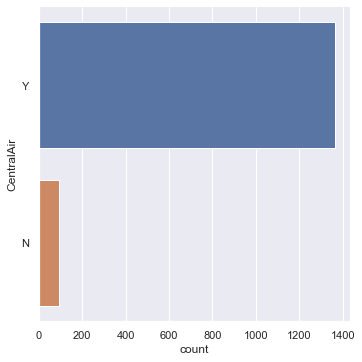

In [7]:
joint = pd.concat([houseCentralAir, houseSalePrice], axis =1)
sb.catplot(data = joint, kind = "count", y = 'CentralAir')

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

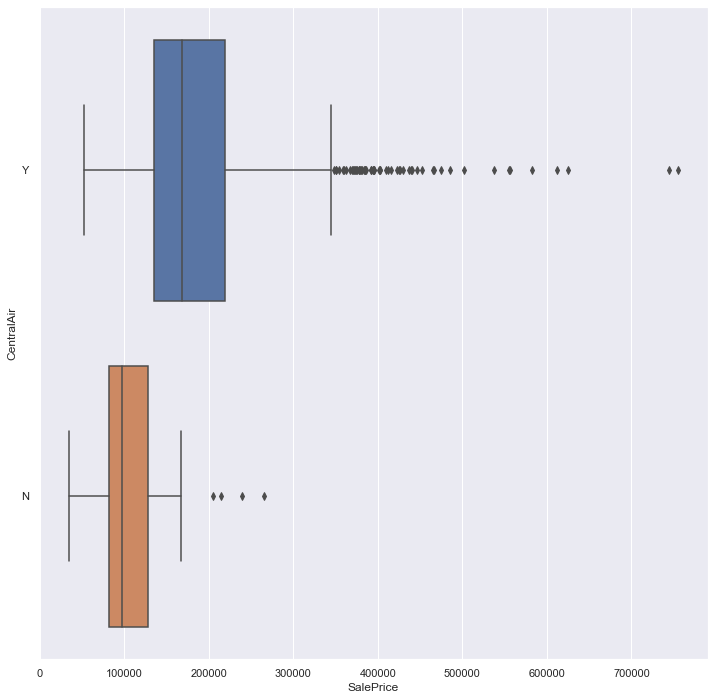

In [8]:
f, axes = plt.subplots(1,1 ,figsize=[12, 12])
sb.boxplot(data = joint, orient='h', y = 'CentralAir', x ='SalePrice')

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

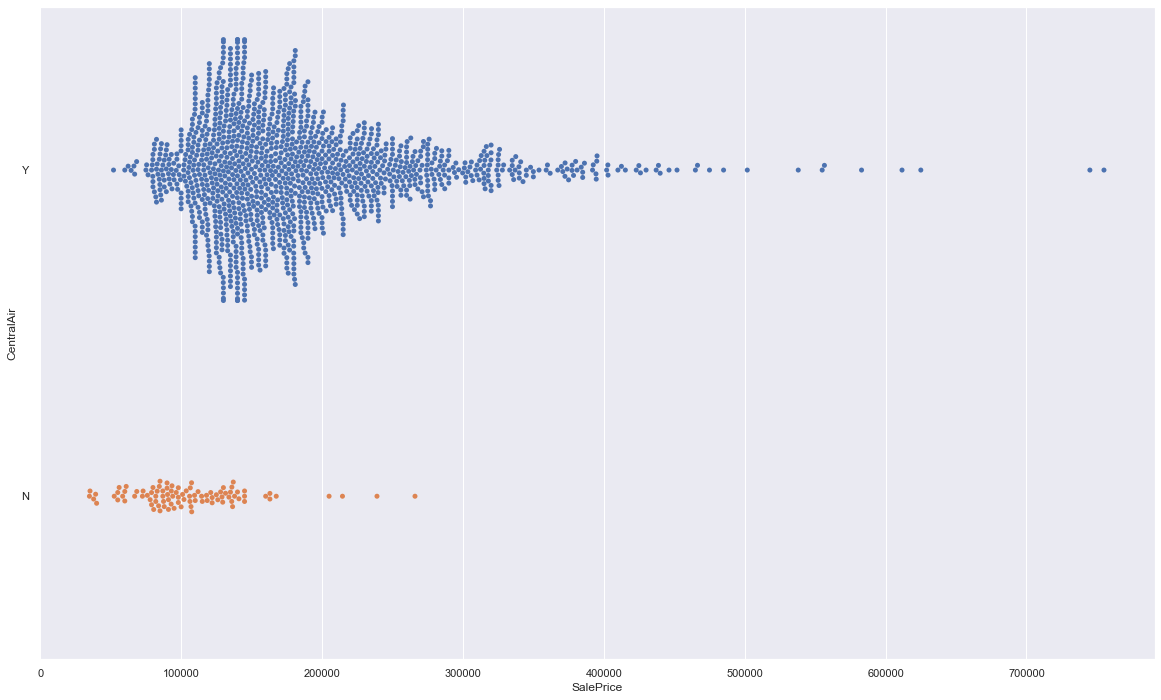

In [9]:
f, axes = plt.subplots(1,1 ,figsize=[20, 12])
sb.swarmplot(data = joint, orient='h', y='CentralAir', x ='SalePrice')

#### b) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

#### c) Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows).


In [11]:
houseCentralAir_train, houseCentralAir_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseCentralAir, houseSalePrice, train_size=1100/1460)

#Check
print("Train Set :", houseCentralAir_train.shape, houseSalePrice_train.shape)
print("Test Set:", houseCentralAir_test.shape, houseSalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set: (360, 1) (360, 1)


#### d) Training : Fit a Decision Tree model for classification of CentralAir using SalePrice using the following variables

`y_train = pd.DataFrame(houseData_train['CentralAir'])`

`X_train = pd.DataFrame(houseData_train['SalePrice'])`


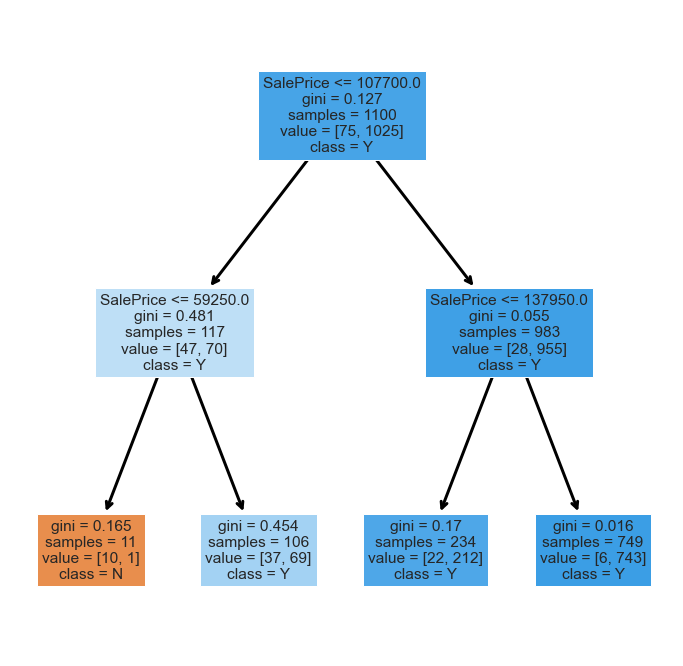

In [12]:
dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(houseSalePrice_train, houseCentralAir_train)


fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, feature_names = houseSalePrice_train.columns, class_names = [str(x) for x in dectree.classes_],filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

#### e) Visualize the Decision Tree model using graphviz (needs the packages to be installed; check if they are installed).

In [13]:
#Don't download

#### f) Predict CentralAir for the train dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix. Predict CentralAir for the test dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.94


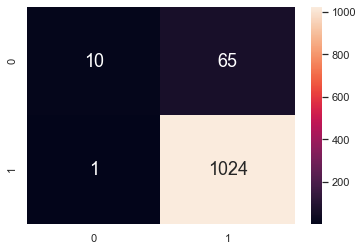

In [14]:
# Predict Legendary corresponding to Total Train
houseCentralAir_train_pred = dectree.predict(houseSalePrice_train)

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(houseCentralAir_train, houseCentralAir_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(houseSalePrice_train, houseCentralAir_train))

In [15]:
# Comments: 
#    TOP LEFT: True -ve
#    TOP RIGHT: False -ve
#    BOTTOM LEFT: False +ve
#    BOTTOM RIGHT: True +ve

#### g) Discuss with your Friends all the accuracy parameters of the decision tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate.

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9444444444444444


<AxesSubplot:>

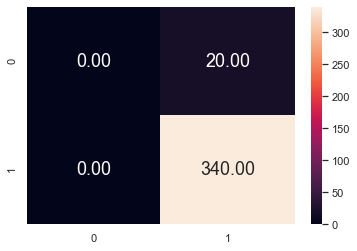

In [16]:
# Predict Legendary corresponding to Total Train
houseCentralAir_test_pred = dectree.predict(houseSalePrice_test)

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(houseSalePrice_test, houseCentralAir_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(houseCentralAir_test, houseCentralAir_test_pred), 
           annot = True, fmt=".2f", annot_kws={"size": 18})

### Problem 2: Predicting CentralAir using Other Variables

Perform all the above steps on 'CentralAir' against each of the variables 'GrLivArea', 'LotArea', 'TotalBsmtSF'
one-by-one to obtain individual Decision Trees. Discuss with your Friends about the models, compare the Classification
Accuracy, check the True Positives and False Positives, and determine which model is the best to predict 'CentralAir'.

#### `CentralAir` against `GrLivArea`

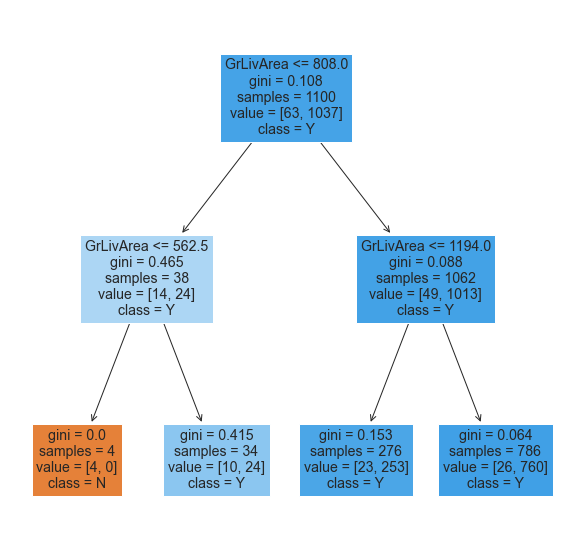

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9463636363636364
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9111111111111111


<AxesSubplot:>

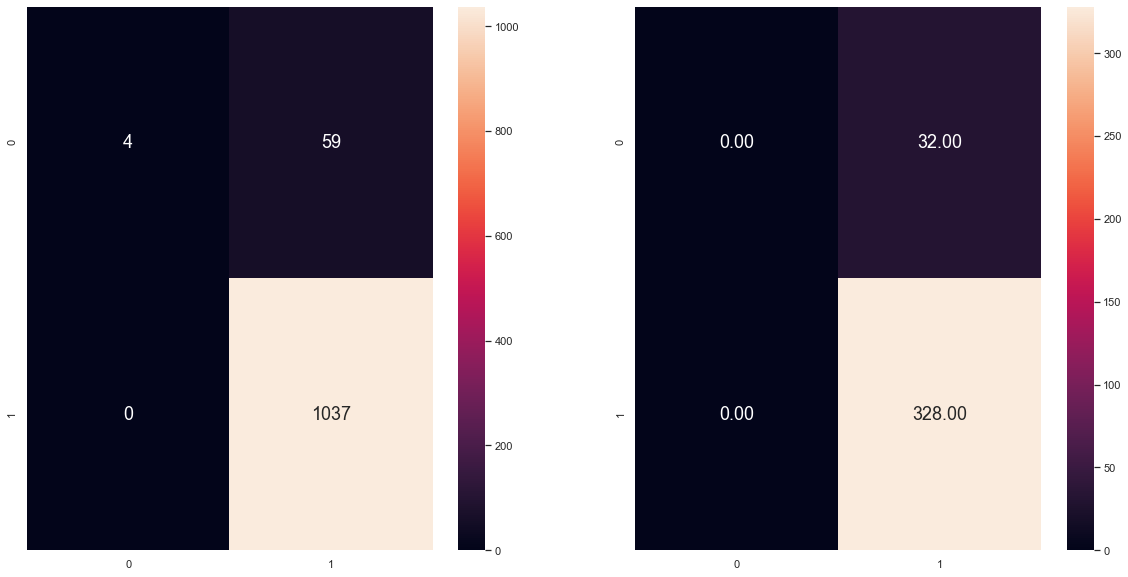

In [17]:
houseCentralAir = pd.DataFrame(houseData['CentralAir'])
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])

# Split data
houseCentralAir_train, houseCentralAir_test, houseGrLivArea_train, houseGrLivArea_test = train_test_split(houseCentralAir, houseGrLivArea, test_size=360/1460)

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(houseGrLivArea_train, houseCentralAir_train)


fig, ax = plt.subplots(figsize=(10, 10))
tree = plot_tree(dectree, feature_names = houseGrLivArea_train.columns, class_names = [str(x) for x in dectree.classes_],filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

f, axes = plt.subplots(1,2, figsize=[20,10])
# Predict Legendary corresponding to Total Train
houseCentralAir_train_pred = dectree.predict(houseGrLivArea_train)

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(houseCentralAir_train, houseCentralAir_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(houseGrLivArea_train, houseCentralAir_train))

houseCentralAir_test_pred = dectree.predict(houseGrLivArea_test)

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(houseGrLivArea_test, houseCentralAir_test))

sb.heatmap(confusion_matrix(houseCentralAir_test, houseCentralAir_test_pred), 
           annot = True, fmt=".2f", annot_kws={"size": 18}, ax = axes[1])

#### `CentralAir` against `LotArea`

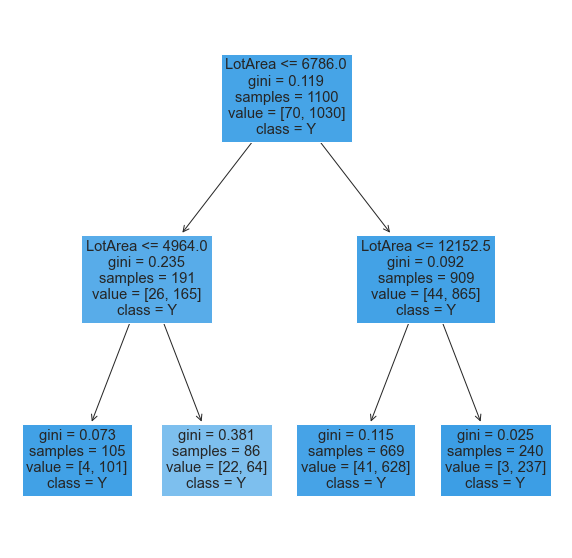

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9363636363636364
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9305555555555556


<AxesSubplot:>

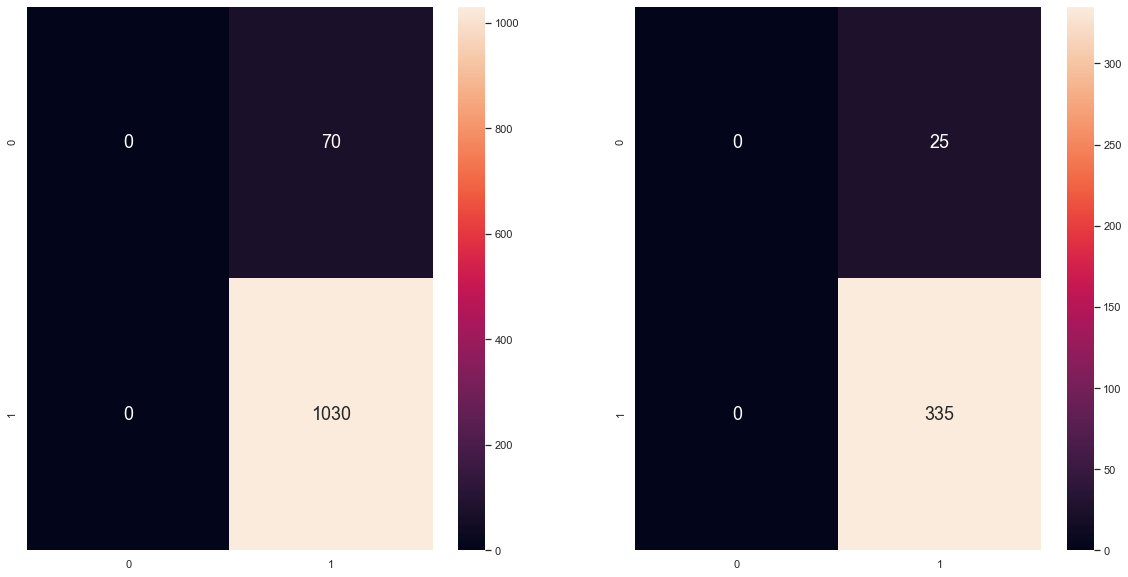

In [18]:
houseCentralAir = pd.DataFrame(houseData['CentralAir'])
houseLotArea = pd.DataFrame(houseData['LotArea'])

# Split data
houseCentralAir_train, houseCentralAir_test, houseLotArea_train, houseLotArea_test = train_test_split(houseCentralAir, houseLotArea, test_size=360/1460)

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(houseLotArea_train, houseCentralAir_train)


fig, ax = plt.subplots(figsize=(10, 10))
tree = plot_tree(dectree, feature_names = houseLotArea_train.columns, class_names = [str(x) for x in dectree.classes_],filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

f, axes = plt.subplots(1,2, figsize=[20,10])
# Predict Legendary corresponding to Total Train
houseCentralAir_train_pred = dectree.predict(houseLotArea_train)

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(houseCentralAir_train, houseCentralAir_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(houseLotArea_train, houseCentralAir_train))

houseCentralAir_test_pred = dectree.predict(houseLotArea_test)

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(houseLotArea_test, houseCentralAir_test))

sb.heatmap(confusion_matrix(houseCentralAir_test, houseCentralAir_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### `CentralAir` against `TotalBsmtSF`

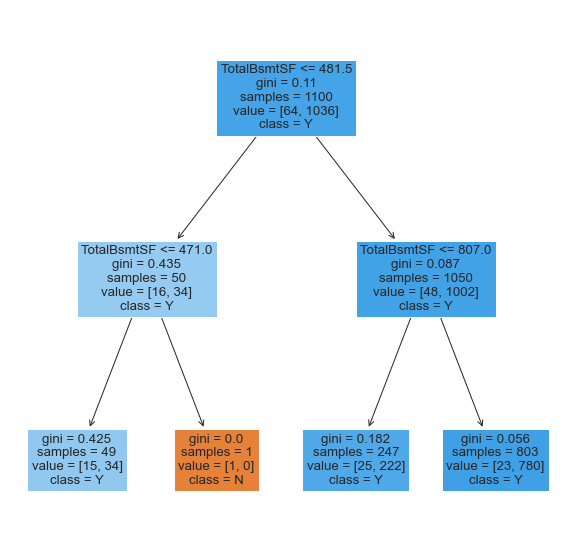

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9427272727272727
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9138888888888889


<AxesSubplot:>

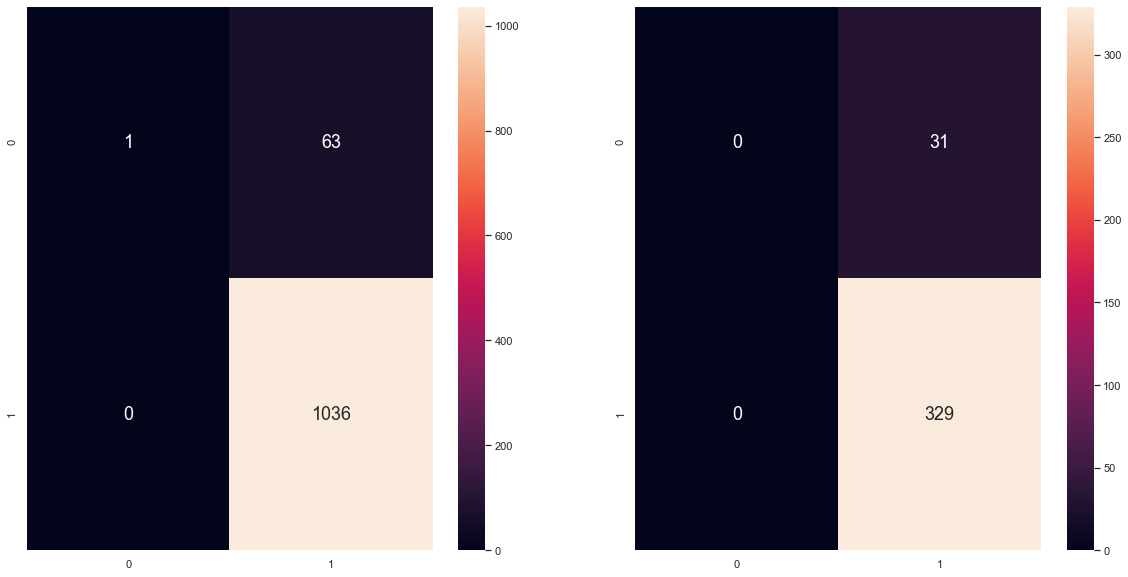

In [19]:
houseCentralAir = pd.DataFrame(houseData['CentralAir'])
houseTotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])

# Split data
houseCentralAir_train, houseCentralAir_test, houseTotalBsmtSF_train, houseTotalBsmtSF_test = train_test_split(houseCentralAir, houseTotalBsmtSF, test_size=360/1460)

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(houseTotalBsmtSF_train, houseCentralAir_train)


fig, ax = plt.subplots(figsize=(10, 10))
tree = plot_tree(dectree, feature_names = houseTotalBsmtSF_train.columns, class_names = [str(x) for x in dectree.classes_],filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

f, axes = plt.subplots(1,2, figsize=[20,10])
# Predict Legendary corresponding to Total Train
houseCentralAir_train_pred = dectree.predict(houseTotalBsmtSF_train)

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(houseCentralAir_train, houseCentralAir_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(houseTotalBsmtSF_train, houseCentralAir_train))

houseCentralAir_test_pred = dectree.predict(houseTotalBsmtSF_test)

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(houseTotalBsmtSF_test, houseCentralAir_test))

sb.heatmap(confusion_matrix(houseCentralAir_test, houseCentralAir_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### Using Multi-Variate Classification Tree

In [20]:
houseCentralAir = pd.DataFrame(houseData["CentralAir"])
multiPred = pd.DataFrame(houseData[["GrLivArea", "LotArea", "TotalBsmtSF"]])

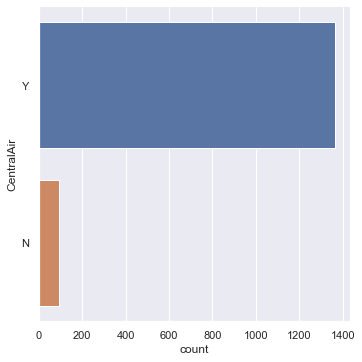

In [21]:
jointplot = pd.concat([houseCentralAir, multiPred], axis=1)

sb.catplot(data=jointplot, kind='count', y='CentralAir')



C:\Users\muhda\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\muhda\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\muhda\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\muhda\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\muhda\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.7% of the points

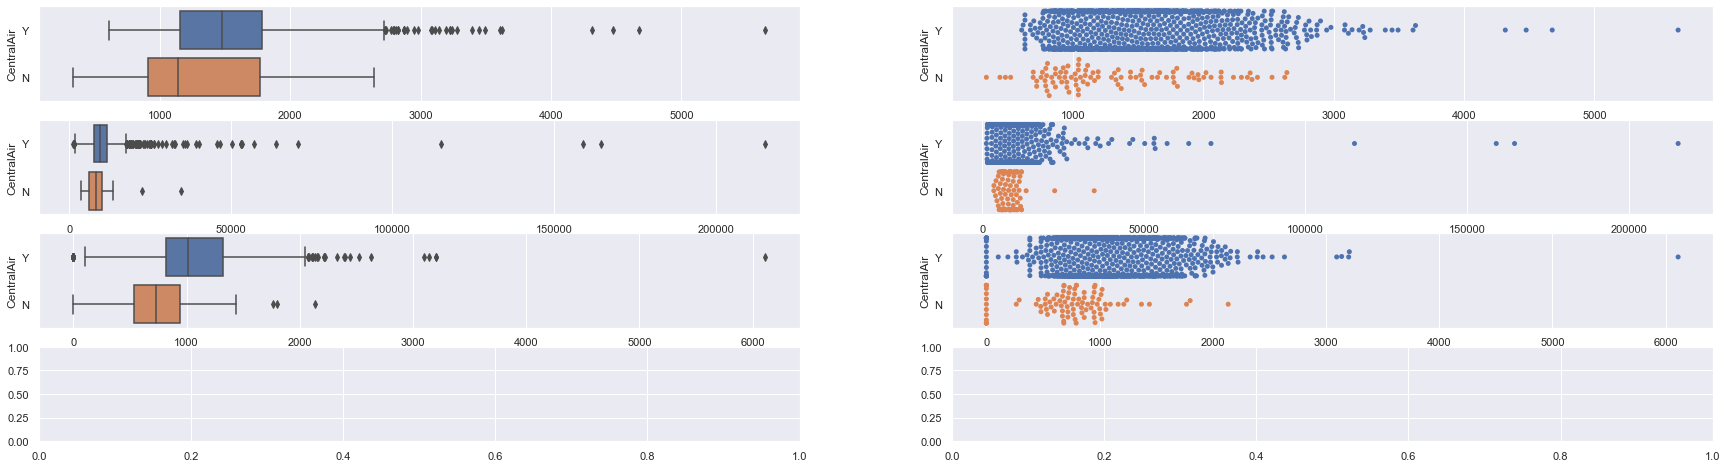

In [25]:
# Plot boxplot and catplot
f, axes = plt.subplots(4,2, figsize=[30,8])
count = 0
for var in multiPred:
    sb.boxplot(data=jointplot, orient='h', y='CentralAir', x=multiPred[var], ax=axes[count,0])
    sb.swarmplot(data=jointplot, orient='h', y='CentralAir', x=multiPred[var], ax=axes[count,1])
    count += 1

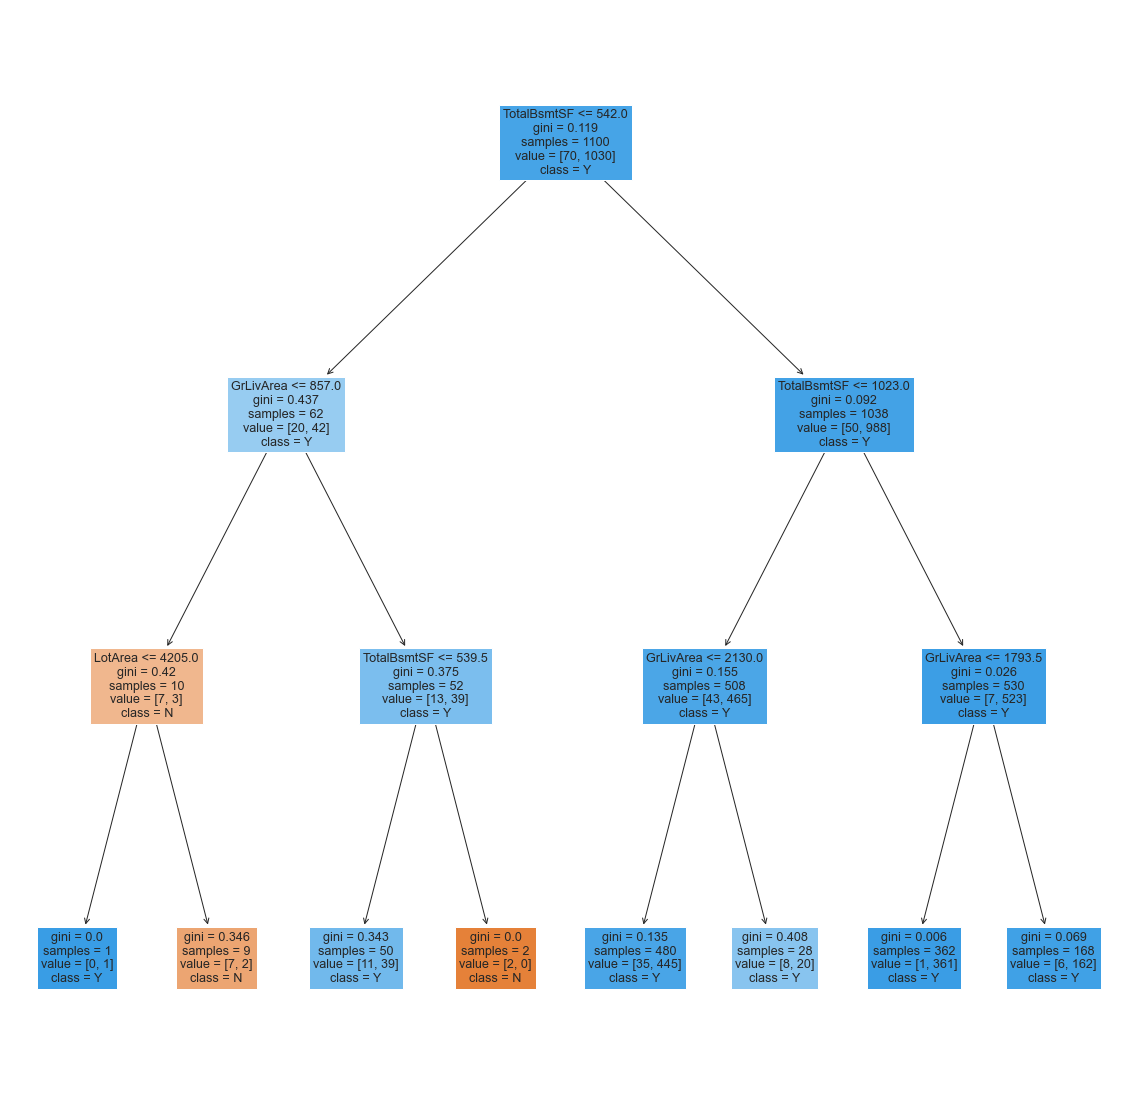

In [23]:
# Split data
houseCentralAir_train, houseCentralAir_test, multiPred_train, multiPred_test = train_test_split(houseCentralAir, multiPred, test_size=360/1460)

dectree = DecisionTreeClassifier(max_depth = 3)
dectree.fit(multiPred_train, houseCentralAir_train)


fig, ax = plt.subplots(figsize=(20, 20))
tree = plot_tree(dectree, feature_names = multiPred_train.columns, class_names = [str(x) for x in dectree.classes_],filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()